# Reducing the number of high fatality accidents

# Content
- Libraries used
- Database description
- Introduction
- Time day and day of the week do major accidents happen
- Patterns in the time of day/ day of the week when major incidents occur
- Stand out characteristic in major incidents compared with other accidents
- Recommendations to focus the brainstroming to reduce major incidents 
- Conclusion

# Libraries used

In [ ]:
#Libraries used for the creation of this analysis. Run this to proced#
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Introduction

In 2020, 1516 people were killed on UK roads, with 1460 deaths recorded in Britain and 56 recorded in Norther Ireland. This was significant decline compared with the previous year is due in part to the lockdown measures that were imposed in response to the COVID-19 pandemic.  The number of road deaths in the UK plateaued from 2012 to 2019 at around 1850 deaths a year, or equivalent of five a day, on average.
The trend relating to serious injuries is more difficult to analyze, as the method the police use to record severity has changed in recent years. However, this number has declined slightly since 2010, the total figure is still more than 22,000 serious injuries a year, or the equivalent of around 60 a day (Brake, 2021)

The reporting department have been collecting data on every accident that is reported in 2020, looking for insights to reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties.

The data used in this report was published by the department for transport. Contains public sector information licensed under the Open Government License v3.0. Link: https://data.gov.uk/dataset/road-accidents-safety-data 


# Database description

In [3]:
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


For doubts about the meaning of any code/format number please use the next code to see their labels

In [ ]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference', 'longitude',
       'latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area'],
      dtype='object')

In [ ]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
#Change the 'day_of_week'for any other on the database to see the code/format and their labels
lookup[lookup['field name'] == 'weather_conditions']

,table,field name,code/format,label,note
86,Accident,weather_conditions,1,Fine no high winds,NaN
87,Accident,weather_conditions,2,Raining no high winds,NaN
88,Accident,weather_conditions,3,Snowing no high winds,NaN
89,Accident,weather_conditions,4,Fine + high winds,NaN
90,Accident,weather_conditions,5,Raining + high winds,NaN
91,Accident,weather_conditions,6,Snowing + high winds,NaN
92,Accident,weather_conditions,7,Fog or mist,NaN
93,Accident,weather_conditions,8,Other,NaN
94,Accident,weather_conditions,9,Unknown,NaN
95,Accident,weather_conditions,-1,Data missing or out of range,NaN


# Time of day and day of the week do major accidents happen

As we said the major incidents are the one with 3+ number of casualities. Using an descriptive analysis the day of the week where most of the major incidents happens was Saturday with 821 reports, and in second place Friday with 798. For reference look in Figure 1 and 2. The time of the day where most of the major incidents happens were 15:30 pm and 16:00 pm with 35 reports both. 

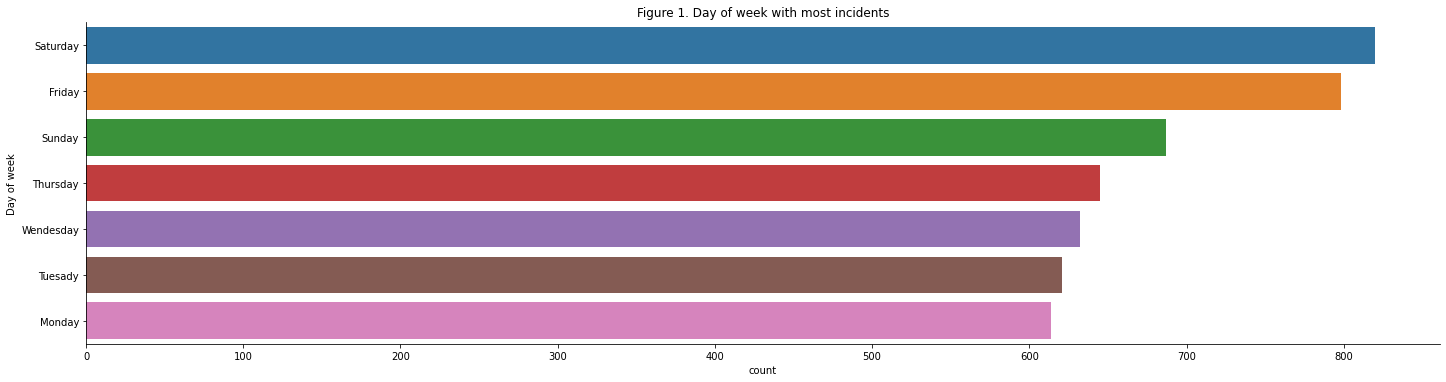

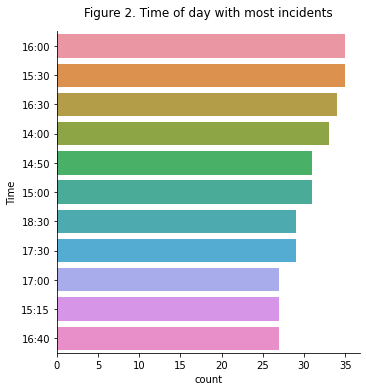

In [ ]:
noc = accidents[(accidents.number_of_casualties >= 3)]
noc['day_of_week'].replace({1:'Sunday',2:'Monday',3:'Tuesady',4:'Wendesday',5:'Thursday',6:'Friday',7:'Saturday'}, inplace= True)

sns.catplot(y='day_of_week',data=noc,kind='count', order=noc.day_of_week.value_counts().index,aspect=4)
plt.ylabel("Day of week")
plt.title("Figure 1. Day of week with most incidents") 
sns.catplot(y='time', data = noc, order=noc.time.value_counts().iloc[:11].index,kind='count')
plt.ylabel("Time")
plt.title("Figure 2. Time of day with most incidents",pad=15) 
plt.show()

Referent to the day of the week where most incidents happen, more reports appear as the weekend approaches, and according to the time, most of the hours go from the mid- afternoon range of 14:00 pm to 16:30 pm.

# Patterns in the time of day/ day of the week when major incidents occur

Using the time of the day and day of the week where most major incidents happen, four graphs were created to search for patterns.

In [ ]:
dows = noc[(noc.day_of_week == 'Saturday')| (noc.time == '15:30')| (noc.time == '16:00') ]

In Figure 3 was compared first road number, first road class and road type. The first step was searching for the top five first road number with most reports finding the numbers of 0 with 281 reports, 6 with 12 reports, 1 with 12 reports, 25 with 11 and 34 with 8. Next, we look up the road type and find that most of the reports are for the road type 6 with more than 628, 3 with 181, 1 with 41, 7 with 20 and 9 with 7. Finally, in the first road class the value with most of the reports goes for 3 with 426 reports, 6 with 240 reports, 4 with 111, 1 with 60 and 5 with 41.

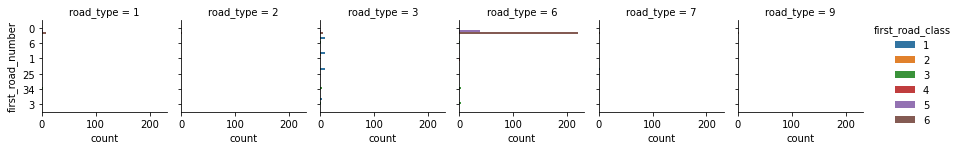

In [ ]:
sns.catplot(y="first_road_number",data=dows,order=dows.first_road_number.value_counts().iloc[:6].index,hue= 'first_road_class', col='road_type',kind='count',height=2) 

As we merge the values in the Figure 3, we perceive that the first road number 0 with road type 6 and firs road class 5 and 6 is the only graph with most of the reports, making a possible point.

In the next Figure where was compared the first road number, speed limit, light conditions, and weather conditions. We can see that most of the reports goes for the graph where the light conditions are 1, second 4 and third 6, with weather condition between 1 and 3 and occasionally 4 to 9. As we can observe in the speed limit almost every graph is between 30 and 60.

In [ ]:
sns.relplot(x ='speed_limit', y=  'first_road_number', hue= 'weather_conditions', col = 'light_conditions', data= dows, kind= 'scatter',height=2 


SyntaxError: invalid syntax (4024570257.py, line 2)

For the next graph is compared the junction detail and junction control, finding that all the junction control type 1 lies with the junction detail 0, while the other junction detail has junction control type 2 and 4, being the junction detail 3 the one with the most elevated junction control 4. 

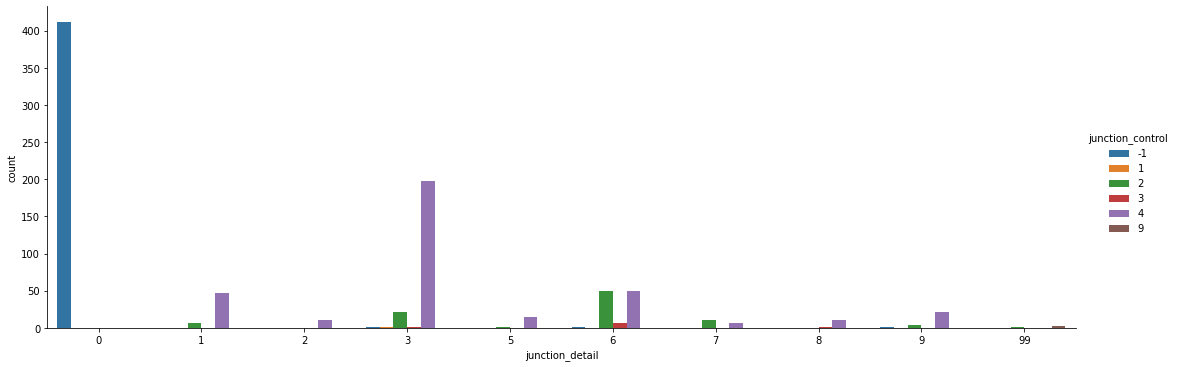

In [ ]:
sns.catplot(x= 'junction_detail',data=dows,kind='count',aspect= 3,hue='junction_control')

In the Figure 6 was compared the road surface conditions and urban or rural area, perceiving that the urban or rural area 1 has more reports road surface conditions 1 than the urban or rural area 2. While the road surface conditions 2 are similar for both graphs. 

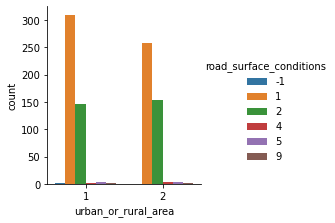

In [ ]:
sns.catplot(x = 'urban_or_rural_area',data=dows, kind='count',hue='road_surface_conditions',height=3)

# Stand out characteristic in major incidents compared with other accidents

Looking for a standout characteristic in major incidents compared with other accidents, it was compared the >=3 casualities and <=2 casualities, and found out that there are more reports for <=2 number of casualties. 

In [ ]:
dows1 = accidents[(accidents.number_of_casualties >= 3)]
dows2 = accidents[(accidents.number_of_casualties <= 2)]
dows1.shape,dows2.shape

((4817, 27), (86382, 27))

Even if the reports are more the distribution between fist road number, road type and first road class look be the same, the road type 6 and first road class 1 distribution is standing out. Another difference between this graph is that the top five first road number changed with less casualties, changing 25,5 and 38 for 4,23 and 3 respectively. Being 0,1 and 6 the same for bout types of casualities

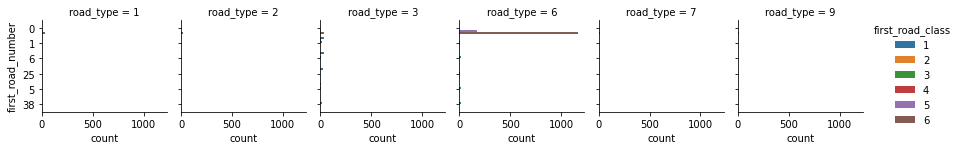

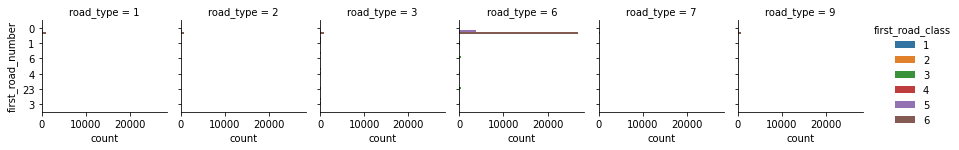

In [ ]:
sns.catplot(y="first_road_number",data=dows1,order=dows1.first_road_number.value_counts().iloc[:6].index,hue= 'first_road_class', col='road_type',kind='count',height=2)
sns.catplot(y="first_road_number",data=dows2,order=dows2.first_road_number.value_counts().iloc[:6].index,hue= 'first_road_class', col='road_type',kind='count',height=2)
 

For the junction detail and junction control relationship the distribution looks to be the same, standing out in both the junction detail 1 and 3. A difference can be seen in the junction control relationship 6, where the junction control have slighlty changes.

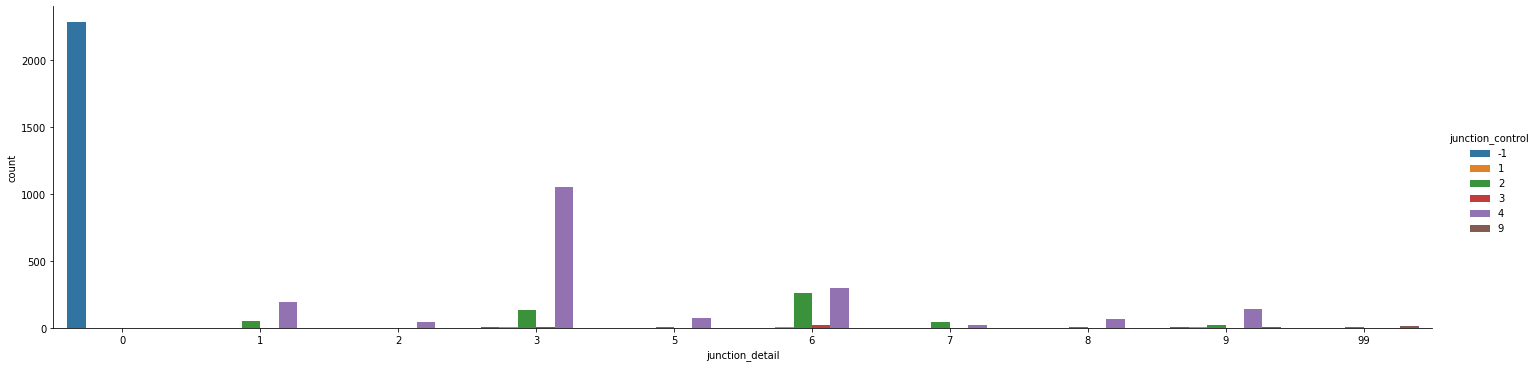

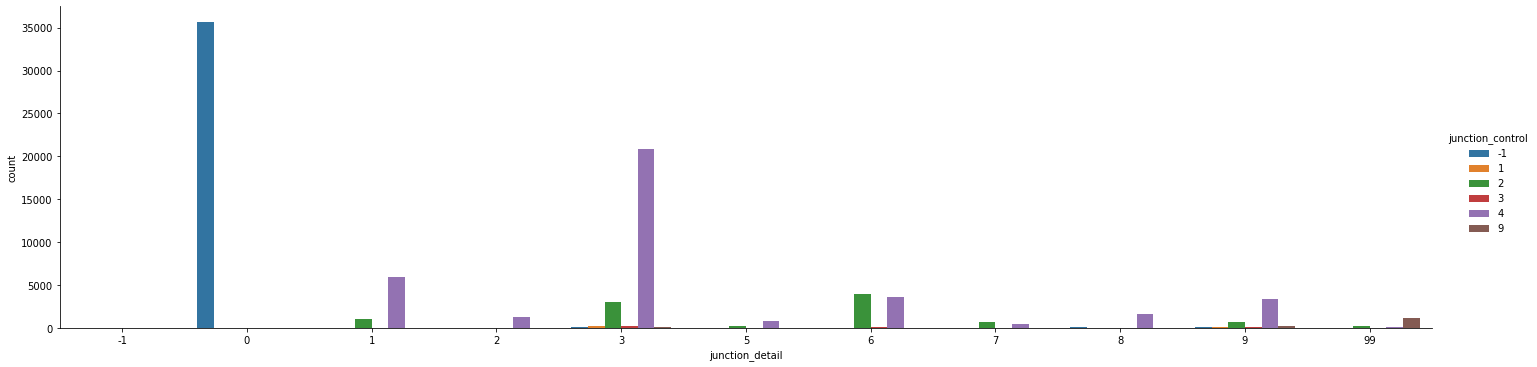

In [ ]:
sns.catplot(x= 'junction_detail',data=dows1,kind='count',aspect= 4,hue='junction_control')
sns.catplot(x= 'junction_detail',data=dows2,kind='count',aspect= 4,hue='junction_control')

For the first road number, speed limit, light conditions, and weather conditions graph in both graphs most of the accidents occur with light conditions 1,4 and 6. About weather conditions looks like most of the <=2 casualties happen between 2 and 4, while major accidents occur with 1 and 3.

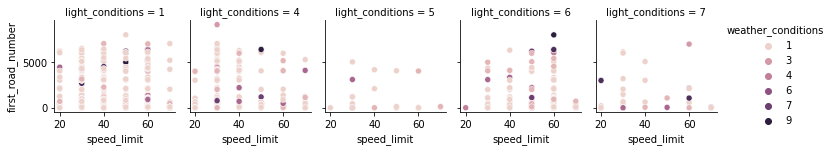

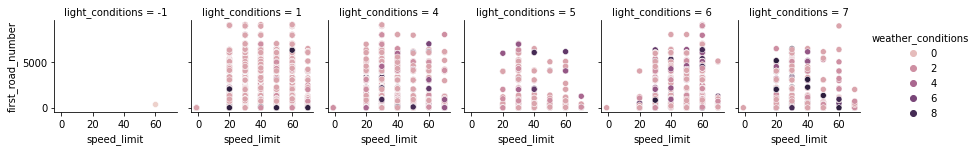

In [ ]:
sns.relplot(x ='speed_limit', y=  'first_road_number', hue= 'weather_conditions', col = 'light_conditions', data= dows1, kind= 'scatter',height=2 )
sns.relplot(x ='speed_limit', y=  'first_road_number', hue= 'weather_conditions', col = 'light_conditions', data= dows2, kind= 'scatter',height=2 ) 

In the last graph where urban or rural area and road surface conditions are monitored, for major accidents the count of reports are similar for road surface conditions 2, and a less than 200 reports for road surface conditions 1. 

Looking in the second graph the difference between road surface conditions 1 and 2 looks being the triple for urban or rural area 1, while in the urban or rural area 2 the condition 1 are two times more than condition 2. And comparing both areas, the 1 first one is three times more than area 2. 

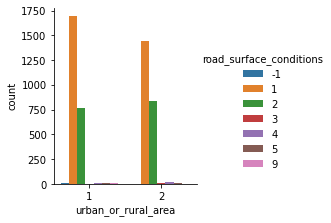

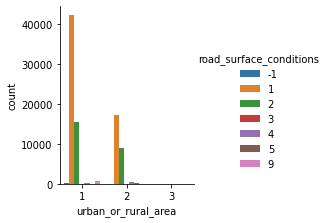

In [ ]:
sns.catplot(x = 'urban_or_rural_area',data=dows1, kind='count',hue='road_surface_conditions',height=3)
sns.catplot(x = 'urban_or_rural_area',data=dows2, kind='count',hue='road_surface_conditions',height=3)

# Recommendations to focus the brainstroming to reduce major incidents 

To focus the brainstorming efforts to reduce major incidents a decision tree was created using the values x and y, being y the dependent variable (number of casualties). For the decision tree the min samples leaf used was 5, the criterion was Gini, and a random state was 111. Using an accuracy of 70 to accept or decline the weight of the analysis.

In [ ]:
x = accidents[['accident_severity','number_of_vehicles', 'day_of_week','first_road_class','first_road_number', 'road_type', 'speed_limit','junction_detail', 'junction_control','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities', 'light_conditions','weather_conditions', 'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards','urban_or_rural_area']]
y = accidents[[ 'number_of_casualties']]

In [ ]:
#Train/ test selection
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=111)
#Algorithm
dt = DecisionTreeClassifier(min_samples_leaf = 5, criterion ='gini')
#Fit
dt.fit(x_train, y_train)
#Importnaces
importancias = dt.feature_importances_
importancias_df = pd.DataFrame({'feature':x.columns,'importancia':importancias})
importancias_df.sort_values(by='importancia',ascending=False,inplace=True)
#Prediction
predicciones = dt.predict(x_test)

importancias_df

,feature,importancia
4,first_road_number,0.311565
2,day_of_week,0.135378
1,number_of_vehicles,0.103436
6,speed_limit,0.087483
7,junction_detail,0.056171
12,weather_conditions,0.046875
11,light_conditions,0.039845
3,first_road_class,0.034249
10,pedestrian_crossing_physical_facilities,0.032726
8,junction_control,0.031973


In [ ]:
exact = accuracy_score(y_test,predicciones)
pres = precision_score(y_test, predicciones,average='macro')
sens = recall_score(y_test, predicciones,average='macro')
f1 = f1_score(y_test,predicciones,average='macro')
print([exact,pres,sens,f1])

[0.7758406432748538, 0.10905820144116855, 0.09672936094900529, 0.0957590034322843]


Looking for the weight of each independent variable the top five are:
-	First road number
-	Day of the week
-	Number of vehicles
-	Speed limit
-	Junction detail

With a accuracy of 77.5438 % we can accept the weight of the analysis.


## Recomendations:

The next points are recommendations for the department of transport for major inccidents (+3 casualities):

- Day of the week where most of the accidents happen: Saturday
- Time of day where most of the accidents happen: 15:30 and 16:00 
- First road number: 0 (type C or unclassified), 6 and 1 
- First road class: 5 (type C) and 6 (Unclassified) 
- First road type: 6 (Single carriageways)
- Lights conditions: 1 (Daylight),  4 (Darnkness- light lit) and 6 (Darkness – no lighting)
- Speed limit: 30 to 60 mph
- Weather conditions: 1 (Fine no high winds) and 3 (Snowing no high winds) 
- Junction detail: 0 (Not at junction or within 20 metres), 3 (T or staggered junction)
- Junction control: -1 (Data missing or out of range), 4 (Give way or uncontrolled), 2 (Auto traffic signal)
- Urban or rural area: 1 (urban), 2 (rural)
- Road surface conditions: 1 (dry), 2 (wet or damp)

# Conclusions

It is concluded with the analysis carried out that most of the accidents occur within the weekend and at noon. In addition to these they happen in places where there is no junction detail or they are T or staggered junction, and the junction control have data missing or out or range. It was even believed that light could have a strong relationship with this, but most accidents occur in daylight. Although within this, the climate seems to have a relationship with the snow without high winds, but also in situations without any problem. Even after this the first road, looks like a major point to focus the efforts as we see in the descriptive analysis and decision tree. And after all, we belive that this insights can help to reduce the major incidents to rescue lifes.

# References

Brake (2021). UK road death and casualty statistics. From: https://www.brake.org.uk/get-involved/take-action/mybrake/knowledge-centre/uk-road-safety